<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

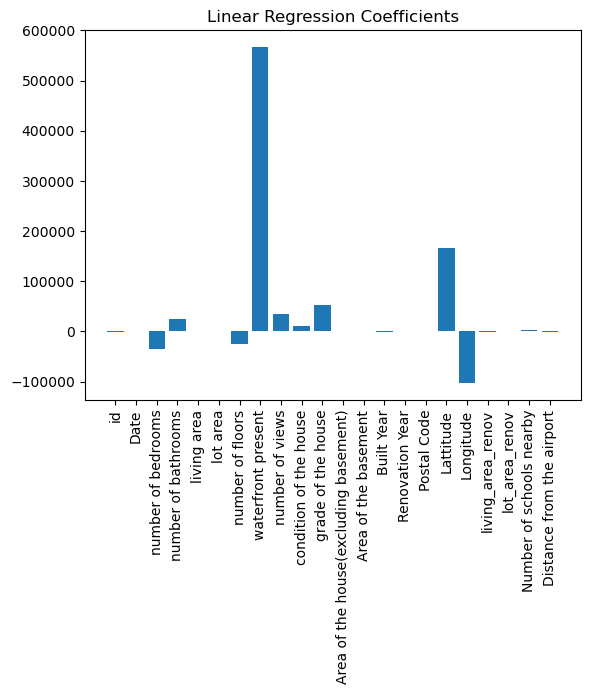

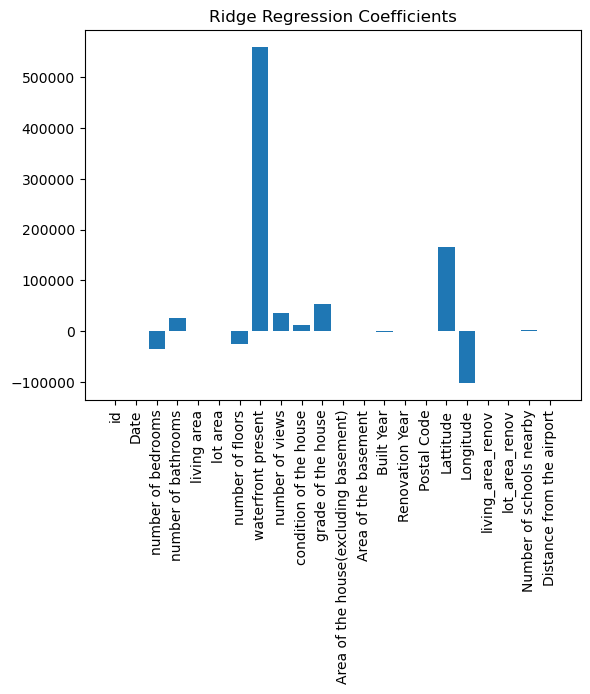

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt 
df=pd.read_csv("D:/house_data.csv")
df.describe(), df.info(), df.head()
df_encoded = pd.get_dummies(df, drop_first=True)
df_cleaned = df_encoded.fillna(df_encoded.mean())

X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

lr_r2=r2_score(y_test,lr_model.predict(X_test))
lr_mse=mean_squared_error(y_test, lr_model.predict(X_test))
ridge_r2=r2_score(y_test,ridge_model.predict(X_test))
ridge_mse=mean_squared_error(y_test, ridge_model.predict(X_test))
print(f"Linear Regression - R²: {lr_r2}, MSE: {lr_mse}")
print(f"Ridge Regression - R²: {ridge_r2}, MSE: {ridge_mse}")

plt.bar(X.columns,lr_model.coef_)
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.show()
plt.bar(X.columns,ridge_model.coef_)
plt.title('Ridge Regression Coefficients')
plt.xticks(rotation=90)
plt.show()
